# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Faiza Latifah
- **Email:** faizalatifah@upi.edu
- **ID Dicoding:** faiza_latifah_WnE9

## Menentukan Pertanyaan Bisnis

- Bagaimana tingkat polusi udara PM2.5 dan PM10 seiring perkembangan waktu?
- Bagaimana rata-rata suhu tahunan di subdistrik dongsi?
- Bagaimana dua fitur yang memiliki nilai korelasi tinggi saling mempengaruhi?

## Import Semua Packages/Library yang Digunakan

In [45]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [47]:
dongsi_df = pd.read_csv("/content/drive/MyDrive/proyek analisis/PRSA_Data_Dongsi_20130301-20170228.csv")
dongsi_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,9.0,9.0,3.0,17.0,300.0,89.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Dongsi
1,2,2013,3,1,1,4.0,4.0,3.0,16.0,300.0,88.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Dongsi
2,3,2013,3,1,2,7.0,7.0,NaN,17.0,300.0,60.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Dongsi
3,4,2013,3,1,3,3.0,3.0,5.0,18.0,NaN,NaN,-1.4,1026.2,-25.5,0.0,N,4.9,Dongsi
4,5,2013,3,1,4,3.0,3.0,7.0,NaN,200.0,84.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Dongsi


**Insight:**
- Dari hasil diatas didapatkan informasi mengenai kolom/fitur apa saja yang ada pada dataset. Kolom-kolom tersebut adalah year, month, day, hour, PM2.5, PM10, SO2, NO2, CO, O3, TEMP, PRES, DEWP, RAIN, wd, WSPM, dan station
- Dari nama-nama kolom diatas diketahui bahwa dalam dataset ini memiliki data waktu yang bisa digunakan untuk melakukan analisis berdasarkan time series.

### Assessing Data

In [48]:
dongsi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34314 non-null  float64
 6   PM10     34511 non-null  float64
 7   SO2      34401 non-null  float64
 8   NO2      33463 non-null  float64
 9   CO       31867 non-null  float64
 10  O3       34400 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [49]:
dongsi_df.isnull().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,750
PM10,553
SO2,663
NO2,1601
CO,3197


In [50]:
dongsi_df.duplicated().sum()

0

**Insight:**
- Terdapat kurang lebih 35000 baris data dalam dataset ini dengan tipe data yang beragam yaitu int, float dan object
- Pada fitur/kolom PM2.5, PM1O, SO2, NO2, CO, O3, TEMP, PRES, DEWP, RAIN, wd,
 dan WSPM banyak baris yang berisi nilai NULL.
- Dari baris-baris yang memiliki banyak nilai null ini akan membantu kita untuk melakukan perencanaan pembersihan data.

### Cleaning Data

In [51]:
dongsi_df['PM2.5'].fillna(dongsi_df['PM2.5'].mean(), inplace=True)
dongsi_df['PM10'].fillna(dongsi_df['PM10'].mean(), inplace=True)
dongsi_df['SO2'].fillna(dongsi_df['SO2'].mean(), inplace=True)
dongsi_df['NO2'].fillna(dongsi_df['NO2'].mean(), inplace=True)
dongsi_df['CO'].fillna(dongsi_df['CO'].mean(), inplace=True)
dongsi_df['O3'].fillna(dongsi_df['O3'].mean(), inplace=True)
dongsi_df['TEMP'].fillna(dongsi_df['TEMP'].mean(), inplace=True)
dongsi_df['PRES'].fillna(dongsi_df['PRES'].mean(), inplace=True)
dongsi_df['DEWP'].fillna(dongsi_df['DEWP'].mean(), inplace=True)
dongsi_df['RAIN'].fillna(dongsi_df['RAIN'].mean(), inplace=True)
dongsi_df['WSPM'].fillna(dongsi_df['WSPM'].mean(), inplace=True)

In [52]:
dongsi_df.isnull().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,0
PM10,0
SO2,0
NO2,0
CO,0


In [53]:
dongsi_df[dongsi_df.wd.isna()]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
16748,16749,2015,1,27,20,35.0,50.0,14.0,66.0,1000.0,2.0,13.67149,1012.547419,2.447535,0.06402,NaN,1.860785,Dongsi
17263,17264,2015,2,18,7,12.0,12.0,8.0,24.0,400.0,50.0,13.67149,1012.547419,2.447535,0.06402,NaN,1.860785,Dongsi
20853,20854,2015,7,17,21,89.0,111.0,4.0,72.0,1700.0,56.0,23.70000,1002.300000,21.600000,0.00000,NaN,0.100000,Dongsi
23035,23036,2015,10,16,19,295.0,318.0,40.0,177.0,2700.0,57.0,16.70000,1012.600000,12.600000,0.00000,NaN,0.200000,Dongsi
23059,23060,2015,10,17,19,357.0,375.0,22.0,215.0,3500.0,5.0,16.00000,1013.600000,13.300000,0.00000,NaN,0.100000,Dongsi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34314,34315,2017,1,28,18,258.0,350.0,58.0,79.0,3100.0,4.0,0.62500,1016.000000,-7.900000,0.00000,NaN,0.500000,Dongsi
34334,34335,2017,1,29,14,15.0,68.0,3.0,8.0,300.0,67.0,-1.22000,1025.000000,-21.600000,0.00000,NaN,6.500000,Dongsi
34560,34561,2017,2,8,0,121.0,146.0,22.0,78.0,2300.0,6.0,-2.80000,1026.300000,-7.000000,0.00000,NaN,0.200000,Dongsi
34638,34639,2017,2,11,6,19.0,19.0,10.0,67.0,1100.0,5.0,-4.60000,1025.000000,-18.100000,0.00000,NaN,0.200000,Dongsi


In [54]:
dongsi_df.dropna(inplace=True)

In [55]:
dongsi_df.isnull().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,0
PM10,0
SO2,0
NO2,0
CO,0


**Insight:**
- Pada data yang bertipe float, saya melakukan imputasi dengan nilai mean untuk menangani baris yang bernilai NULL. Dengan melakukan ini, dataset bisa lebih lengkap dan analisis bisa dilakukan secara maksimal dengan mempertahankan keadaan data.
- Sedangkan untuk kolom wd, saya melakukan drop table karena jumlah baris pada kolom wd yang bernilai null hanya sedikit.

## Exploratory Data Analysis (EDA)

### Explore ...

In [56]:
dongsi_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34986 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       34986 non-null  int64  
 1   year     34986 non-null  int64  
 2   month    34986 non-null  int64  
 3   day      34986 non-null  int64  
 4   hour     34986 non-null  int64  
 5   PM2.5    34986 non-null  float64
 6   PM10     34986 non-null  float64
 7   SO2      34986 non-null  float64
 8   NO2      34986 non-null  float64
 9   CO       34986 non-null  float64
 10  O3       34986 non-null  float64
 11  TEMP     34986 non-null  float64
 12  PRES     34986 non-null  float64
 13  DEWP     34986 non-null  float64
 14  RAIN     34986 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     34986 non-null  float64
 17  station  34986 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 5.1+ MB


In [57]:
dongsi_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,34986.000000,34986.000000,34986.000000,34986.000000,34986.000000,34986.000000,34986.000000,34986.000000,34986.000000,34986.000000,34986.000000,34986.000000,34986.000000,34986.000000,34986.000000,34986.000000
mean,17501.149831,2014.658864,6.524610,15.723947,11.501572,86.152142,110.281956,18.537464,53.648381,1329.264392,57.291110,13.687109,1012.537435,2.453547,0.064137,1.863465
std,10110.196385,1.175564,3.446478,8.801516,6.918762,85.640682,97.447333,22.701634,33.154357,1135.534229,57.505181,11.455108,10.265638,13.812112,0.786929,1.279288
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.642600,-16.800000,987.100000,-35.300000,0.000000,0.000000
25%,8747.250000,2014.000000,4.000000,8.000000,6.000000,23.000000,38.000000,4.000000,28.000000,600.000000,13.000000,3.100000,1004.000000,-8.800000,0.000000,1.000000
50%,17495.500000,2015.000000,7.000000,16.000000,12.000000,63.000000,88.000000,10.000000,49.000000,1100.000000,46.000000,14.600000,1012.200000,3.000000,0.000000,1.500000
75%,26246.750000,2016.000000,10.000000,23.000000,17.000000,117.000000,150.000000,24.000000,72.000000,1600.000000,80.000000,23.500000,1020.900000,15.000000,0.000000,2.400000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,737.000000,955.000000,300.000000,258.000000,10000.000000,1071.000000,41.100000,1042.000000,28.800000,46.400000,10.500000


In [58]:
dongsi_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34986 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       34986 non-null  int64  
 1   year     34986 non-null  int64  
 2   month    34986 non-null  int64  
 3   day      34986 non-null  int64  
 4   hour     34986 non-null  int64  
 5   PM2.5    34986 non-null  float64
 6   PM10     34986 non-null  float64
 7   SO2      34986 non-null  float64
 8   NO2      34986 non-null  float64
 9   CO       34986 non-null  float64
 10  O3       34986 non-null  float64
 11  TEMP     34986 non-null  float64
 12  PRES     34986 non-null  float64
 13  DEWP     34986 non-null  float64
 14  RAIN     34986 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     34986 non-null  float64
 17  station  34986 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 5.1+ MB


In [59]:
dongsi_df_num = dongsi_df.select_dtypes(include=['float64'])

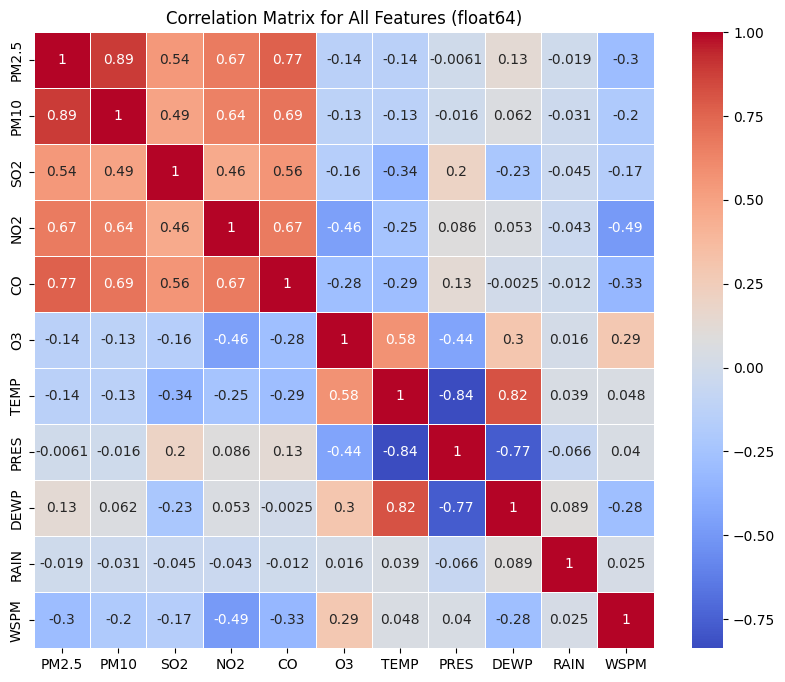

In [60]:
corr_matrix = dongsi_df_num.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix for All Features (float64)')
plt.show()

In [61]:
dongsi_df.to_csv("updated dongsi data.csv", index=False)

**Insight:**
- Pada proses EDA, kita dapat menemukan korelasi antar fitur (dalam kasus ini menggunakan fitur yang bertipe float64) agar memudahkan melihat korelasi antar fitur dengan menggunakan heatmap.
- Dari heatmap diatas korelasi yang bernilai positif yang tertinggi didapat dari PM2.5 dan PM10 dengan nilai 0.89
- Sedangkan korelasi yang bernilai negatif tertinggi didapat dari fitur PRES dan TEMP.

## Visualization & Explanatory Analysis

In [62]:
new_df = pd.read_csv("/content/updated dongsi data.csv")
new_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,9.0,9.0,3.000000,17.000000,300.000000,89.000000,-0.5,1024.5,-21.4,0.0,NNW,5.7,Dongsi
1,2,2013,3,1,1,4.0,4.0,3.000000,16.000000,300.000000,88.000000,-0.7,1025.1,-22.1,0.0,NW,3.9,Dongsi
2,3,2013,3,1,2,7.0,7.0,18.531107,17.000000,300.000000,60.000000,-1.2,1025.3,-24.6,0.0,NNW,5.3,Dongsi
3,4,2013,3,1,3,3.0,3.0,5.000000,18.000000,1330.069131,57.210637,-1.4,1026.2,-25.5,0.0,N,4.9,Dongsi
4,5,2013,3,1,4,3.0,3.0,7.000000,53.699443,200.000000,84.000000,-1.9,1027.1,-24.5,0.0,NNW,3.2,Dongsi


### Pertanyaan 1:

Menggabungkan fitur year, month, day, dan hour untuk membuat analisis lebih terurut dan terstruktur

In [63]:
new_df['datetime'] = pd.to_datetime(new_df[['year', 'month', 'day', 'hour']])

In [64]:
new_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
0,1,2013,3,1,0,9.0,9.0,3.000000,17.000000,300.000000,89.000000,-0.5,1024.5,-21.4,0.0,NNW,5.7,Dongsi,2013-03-01 00:00:00
1,2,2013,3,1,1,4.0,4.0,3.000000,16.000000,300.000000,88.000000,-0.7,1025.1,-22.1,0.0,NW,3.9,Dongsi,2013-03-01 01:00:00
2,3,2013,3,1,2,7.0,7.0,18.531107,17.000000,300.000000,60.000000,-1.2,1025.3,-24.6,0.0,NNW,5.3,Dongsi,2013-03-01 02:00:00
3,4,2013,3,1,3,3.0,3.0,5.000000,18.000000,1330.069131,57.210637,-1.4,1026.2,-25.5,0.0,N,4.9,Dongsi,2013-03-01 03:00:00
4,5,2013,3,1,4,3.0,3.0,7.000000,53.699443,200.000000,84.000000,-1.9,1027.1,-24.5,0.0,NNW,3.2,Dongsi,2013-03-01 04:00:00


In [65]:
new_df.set_index('datetime', inplace=True)

visualisasi hasil analisis dengan line chart

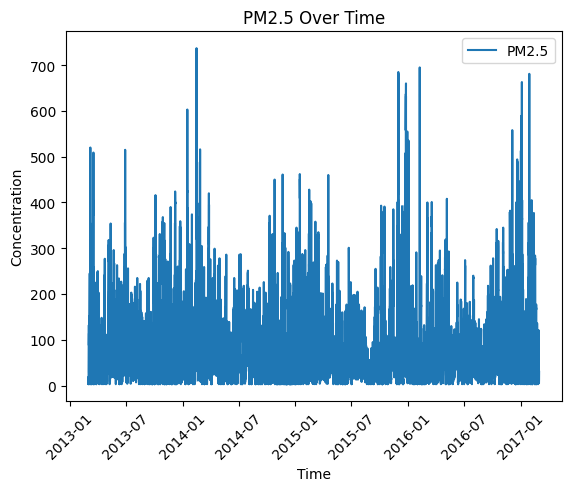

In [66]:
plt.plot(new_df.index, new_df['PM2.5'], label='PM2.5')

plt.title('PM2.5 Over Time')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.xticks(rotation=45)

plt.legend()
plt.show()

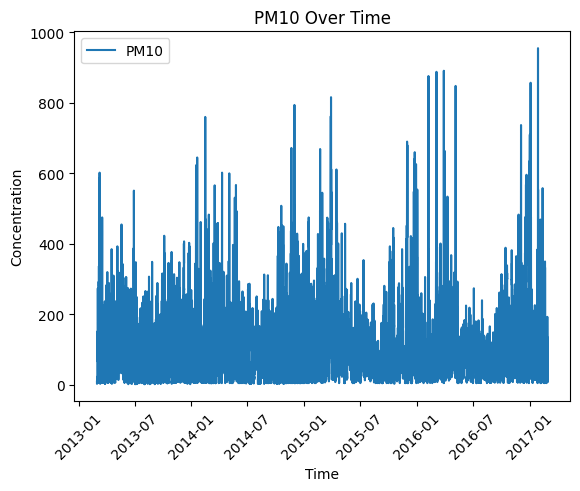

In [67]:
plt.plot(new_df.index, new_df['PM10'], label='PM10')

plt.title('PM10 Over Time')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.xticks(rotation=45)

plt.legend()
plt.show()

**Insight:**
- Untuk polusi udara PM2.5 mengalami kenaikan pada awal tahun, terlihat pada grafik pada waktu 2014-1, 2015-1, dan 2017-1
- Untuk polusi udara PM1O mengalami kenaikan secara teratur pada awal tahun terlihat pada grafik yang mengalami peningkatan

###Pertanyaan 2:

In [68]:
new_df['datetime'] = pd.to_datetime(new_df[['year', 'month', 'day', 'hour']])
new_df.set_index('datetime', inplace=True)

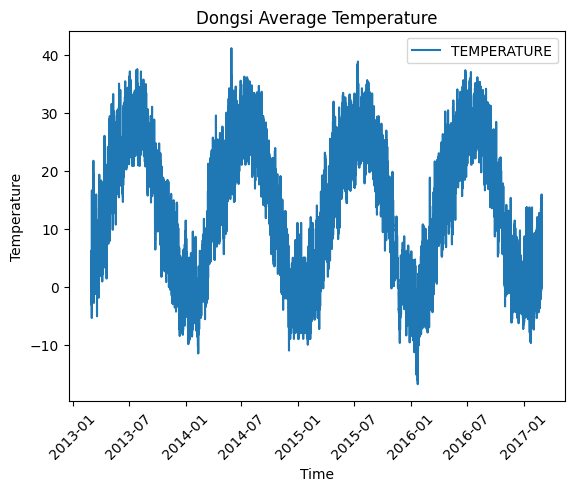

In [69]:
plt.plot(new_df.index, new_df['TEMP'], label='TEMPERATURE')

plt.title('Dongsi Average Temperature')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.xticks(rotation=45)

plt.legend()
plt.show()

**Insight:**
- Untuk suhu yang berkisar di tahun 2013-2017, menunjukkan angka yang cukup konsisten pada setiap periodenya

###Pertanyaan 3:

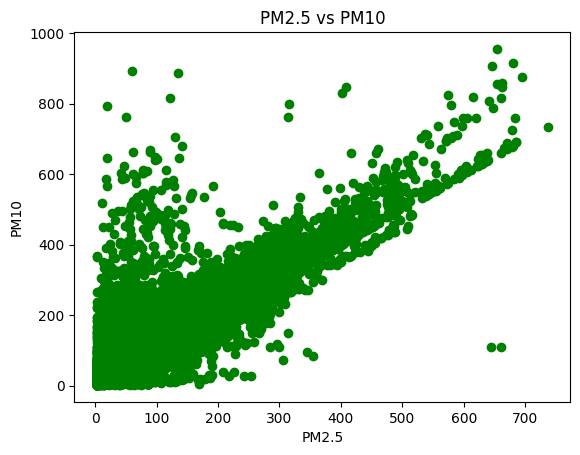

In [70]:
x = 'PM2.5'
y = 'PM10'

plt.scatter(new_df[x], new_df[y], color='green')
plt.xlabel(x)
plt.ylabel(y)
plt.title(f'{x} vs {y}')
plt.show()

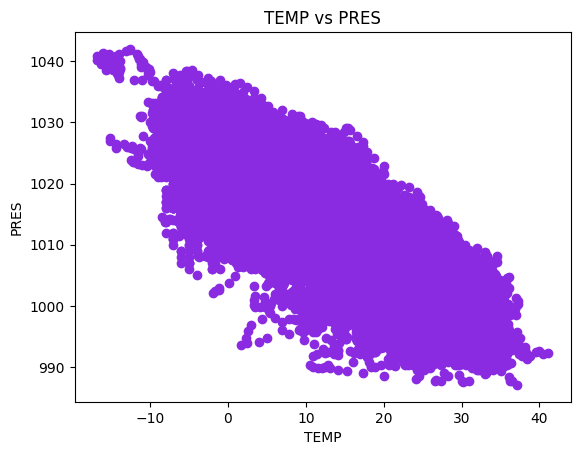

In [71]:
x = 'TEMP'
y = 'PRES'

plt.scatter(new_df[x], new_df[y], color='#8A2BE2')
plt.xlabel(x)
plt.ylabel(y)
plt.title(f'{x} vs {y}')
plt.show()

**Insight:**
- Pada scatter plot PM2.5 vs PM 10 menunjukkan bagaimana bentuk scatter plot untuk fitur yang memiliki korelasi positif dan scatter plot TEMP vs PRES menunjukkan bagaimana bentuk scatter plot untuk korelasi negatif

## Analisis Lanjutan (Opsional)

## Menggunakan Geopandas untuk Menampilkan Beijing Map

In [72]:
import geopandas as gpd

In [73]:
gdf = gpd.read_file('/content/drive/MyDrive/geopandas/gadm41_CHN_shp')

/usr/local/lib/python3.10/dist-packages/pyogrio/geopandas.py:261: UserWarning: More than one layer found in 'gadm41_CHN_shp': 'gadm41_CHN_1' (default), 'gadm41_CHN_0', 'gadm41_CHN_2', 'gadm41_CHN_3'. Specify layer parameter to avoid this warning.
  result = read_func(


In [74]:
gdf.head()

,GID_1,GID_0,COUNTRY,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,ISO_1,geometry
0,CHN.1_1,CHN,China,Anhui,Ānhuī,安徽|安徽,Shěng,Province,NA,CN.AH,CN-AH,"POLYGON ((118.71594 31.28814, 118.72051 31.282..."
1,CHN.2_1,CHN,China,Beijing,Běijīng,北京|北京,Zhíxiáshì,Municipality,NA,CN.BJ,CN-BJ,"POLYGON ((116.71038 39.61697, 116.69884 39.617..."
2,CHN.3_1,CHN,China,Chongqing,Chóngqìng,重慶|重庆,Zhíxiáshì,Municipality,NA,CN.CQ,CN-CQ,"POLYGON ((108.3877 29.82239, 108.38872 29.8269..."
3,CHN.4_1,CHN,China,Fujian,Fújiàn,福建,Shěng,Province,NA,CN.FJ,CN-FJ,"MULTIPOLYGON (((117.42181 23.56431, 117.42125 ..."
4,CHN.5_1,CHN,China,Gansu,Gānsù,甘肅|甘肃,Shěng,Province,NA,CN.GS,CN-GS,"POLYGON ((105.43304 36.32735, 105.43988 36.326..."


In [75]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   GID_1      37 non-null     object  
 1   GID_0      37 non-null     object  
 2   COUNTRY    37 non-null     object  
 3   NAME_1     37 non-null     object  
 4   VARNAME_1  37 non-null     object  
 5   NL_NAME_1  37 non-null     object  
 6   TYPE_1     37 non-null     object  
 7   ENGTYPE_1  37 non-null     object  
 8   CC_1       37 non-null     object  
 9   HASC_1     37 non-null     object  
 10  ISO_1      37 non-null     object  
 11  geometry   37 non-null     geometry
dtypes: geometry(1), object(11)
memory usage: 3.6+ KB


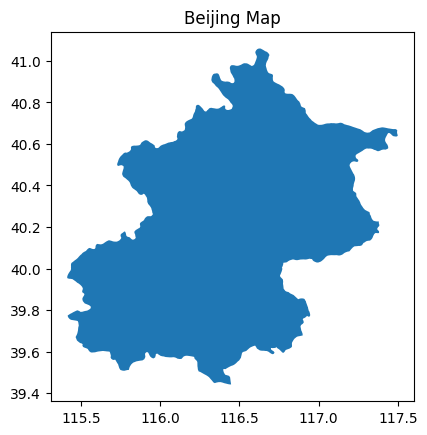

In [76]:
beijing = gdf[gdf['NAME_1'] == 'Beijing']

beijing.plot()
plt.title('Beijing Map')
plt.show()

## Menerapkan Teknik Binning untuk Clustering

Melakukan clustering pada fitur "PRES" agar dapat dikategorikan menjadi 3 jenis, yaitu low, medium, dan high dengan teknik binning.

In [77]:
new_df['bin'] = pd.cut(new_df['PRES'], bins=3, labels=['low', 'medium', 'high'])

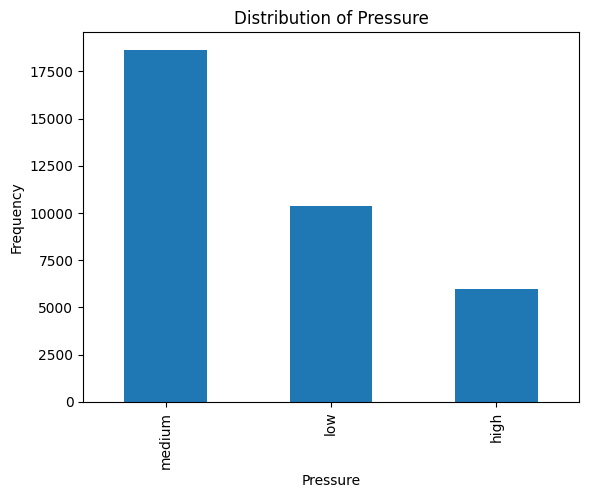

In [78]:
new_df['bin'].value_counts().plot(kind='bar')
plt.title('Distribution of Pressure')
plt.xlabel('Pressure')
plt.ylabel('Frequency')
plt.show()

**Insight:**
- Setelah data pressure selesai diclustering, ditemukan bahwa tekanan udara yang bernilai medium paling sering muncul/terjadi. Sedangkan tekanan udara yang tinggi paling sedikit terjadi.

## Conclusion

- Conclution pertanyaan 1:
Dapat disimpulkan bahwa baik polusi udara PM2.5 dan PM10 sama sama mengalami kenaikan, perbedaan hanya terletak pada PM10 yang paling terlihat mengalami kenaikan secara teratur. Hal ini bisa mengindikasikan kualitas udara yang terus memburuk seiring berjalannya waktu. Apabila tidak ada pencegahan khusus untuk menurunkan kadar polusi udara, bukan tidak mungkin untuk kadar gas-gas berbahaya ikut meningkat dan memperburuk kualitas hidup warga sekitar.
- Conclution pertanyaan 2:
Dari grafik dapat disimpulkan bahwa rata-rata suhu berkisar antara 20-30 derajat. Namun suhu tertinggi yang pernah tercatat berada di 40 derajat. Untuk suhu yang terjadi sepanjang 2013 hingga 2017 tidak ada perubahan yang signifikan.
- Conclusion pertanyaan 3:
Dari korelasi positif antara PM2.5 dan PM10 menunjukkan bahwa apabila polusi udara PM2.5 mengalami kenaikan, maka polusi udara PM10 juga akan mengalami kenaikan. Dengan kata lain, kenaikan partikel polusi kecil disertai kenaikan partikel polusi yang lebih besar.
Sedangkan untuk korelasi negatif antara Temperature dan Pressure menunjukkan bahwa apabila salah satu fitur mengalami kenaikan, maka fitur yang lain akan mengalami penurunan. Dalam hal ini yaitu ketika Temperature naik, maka Pressure akan cenderung turun.